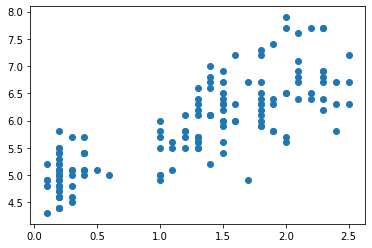

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris

iris = load_iris()

x_vals = np.array([x[3] for x in iris.data]) # Petal Width
y_vals = np.array([y[0] for y in iris.data])  # Sepal Length

from sklearn.model_selection import train_test_split
x_vals_train,x_vals_test,y_vals_train,y_vals_test = train_test_split(x_vals,y_vals,test_size=0.33, random_state=42)

import matplotlib.pyplot as plt
plt.scatter(x_vals,y_vals)

# Declare batch size
batch_size = 50

In [3]:
# Create variables for linear regression
A = tf.Variable(tf.random.normal(shape=[1,1]))
b = tf.Variable(tf.random.normal(shape=[1,1]))


loss = []
optimizer = tf.optimizers.SGD(0.075)

In [4]:
for i in range(1000):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = y_vals_train[rand_index]
    
    rand_x = tf.expand_dims(tf.constant(rand_x,tf.float32),1)
    rand_y = tf.expand_dims(tf.constant(rand_y,tf.float32),1)
    
    with tf.GradientTape() as t:
        # Declare model operations
        model_output = tf.add(tf.matmul(rand_x, A), b)
        
        # Declare loss function
        # = max(0, abs(target - predicted) + epsilon)
        # 1/2 margin width parameter = epsilon

        epsilon = tf.constant(0.5)
        ## Margin term in loss
        curr_loss = tf.reduce_mean(tf.maximum(0., tf.subtract(tf.abs(tf.subtract(model_output, rand_y)), epsilon)))
    grads = t.gradient(curr_loss,[A,b])
    optimizer.apply_gradients(zip(grads,[A,b]))
    
    if((i%10) ==0):
        loss.append(curr_loss)

In [6]:
loss[:10]

[<tf.Tensor: shape=(), dtype=float32, numpy=4.816481>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.8227968>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.160727>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.5256315>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.50426996>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.5135059>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.25466472>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.2604516>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.22748543>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.1809238>]

In [7]:
slope = np.squeeze(A.numpy()).tolist()
y_intercept = np.squeeze(b.numpy()).tolist()
width = epsilon.numpy()

In [8]:

# Get best fit line
best_fit = []
best_fit_upper = []
best_fit_lower = []

In [9]:
for i in x_vals:
    best_fit.append(slope*i+y_intercept)
    best_fit_upper.append(slope*i+y_intercept+width)
    best_fit_lower.append(slope*i+y_intercept-width)

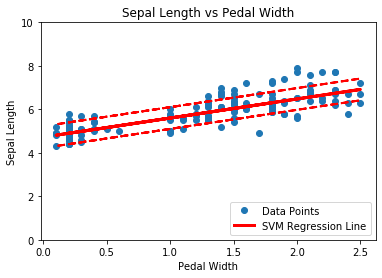

In [10]:
import matplotlib.pyplot as plt

# Plot fit with data
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='SVM Regression Line', linewidth=3)
plt.plot(x_vals, best_fit_upper, 'r--', linewidth=2)
plt.plot(x_vals, best_fit_lower, 'r--', linewidth=2)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()
